<a href="https://www.kaggle.com/code/tiwariaman01/covid-19-eda?scriptVersionId=182088922" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')#'ggplot','Solarize_Light2','dark_background'


In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths and reported recoveries. Data is disaggregated by country (and sometimes subregion). Coronavirus disease (COVID-19) is caused by the Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the Coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes time series data tracking the number of people affected by COVID-19 worldwide, including:

confirmed tested cases of Coronavirus infection
the number of people who have reportedly died while sick with Coronavirus
the number of people who have reportedly recovered from it

In [3]:
covid = pd.read_csv('/kaggle/input/covid-19/data/countries-aggregated.csv',parse_dates=['Date'])


covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


In [5]:
covid.shape

(161568, 5)

In [6]:
covid.isnull().sum()/covid.shape[0]*100

Date         0.0
Country      0.0
Confirmed    0.0
Recovered    0.0
Deaths       0.0
dtype: float64

In [7]:
covid.describe()

,Date,Confirmed,Recovered,Deaths
count,161568,1.615680e+05,1.615680e+05,161568.000000
mean,2021-03-04 11:59:59.999999232,7.361569e+05,1.453967e+05,13999.436089
min,2020-01-22 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,2020-08-12 18:00:00,1.220000e+03,0.000000e+00,17.000000
50%,2021-03-04 12:00:00,2.369200e+04,1.260000e+02,365.000000
75%,2021-09-24 06:00:00,2.558420e+05,1.797225e+04,4509.000000
max,2022-04-16 00:00:00,8.062512e+07,3.097475e+07,988609.000000
std,NaN,3.578884e+06,9.748275e+05,59113.581271


In [8]:
covid['total_case'] = covid[['Confirmed','Recovered','Deaths']].sum(axis=1)

# **EDA analysis**


"I am planning to perform an Exploratory Data Analysis (EDA) on a COVID-19 dataset. The objective of this analysis is to understand the global impact of the COVID-19 virus from 2021 to 2022. I aim to uncover insights about the effects of COVID-19 across the world and within specific countries. An integral part of my analysis process will be to examine the death and recovery rates in each country over the year.

In preparation for this analysis, I have reviewed the dataset and data table and have identified several key questions that will guide my investigation."

Displaying Data for 2022-04-16


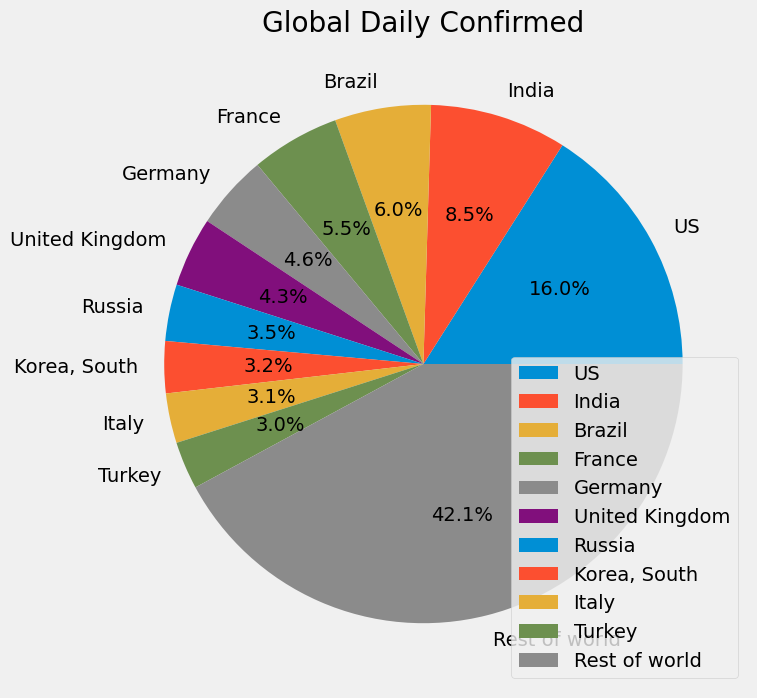

In [9]:


yesterday="2022-04-16"

today_covid=covid[covid['Date']==yesterday ]
top_10=today_covid.sort_values(['Confirmed'],ascending=False)[:10]
top_10
top_10.loc['rest-of-world']=today_covid.sort_values(['Confirmed'],ascending=False)[10:].sum(numeric_only=True)

top_10.loc['rest-of-world','Country']= "Rest of world"
top_10
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)
ax.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('Global Daily Confirmed')
print("Displaying Data for",yesterday)

plt.legend(loc='best')
plt.show()

Displaying Data for 2022-04-16


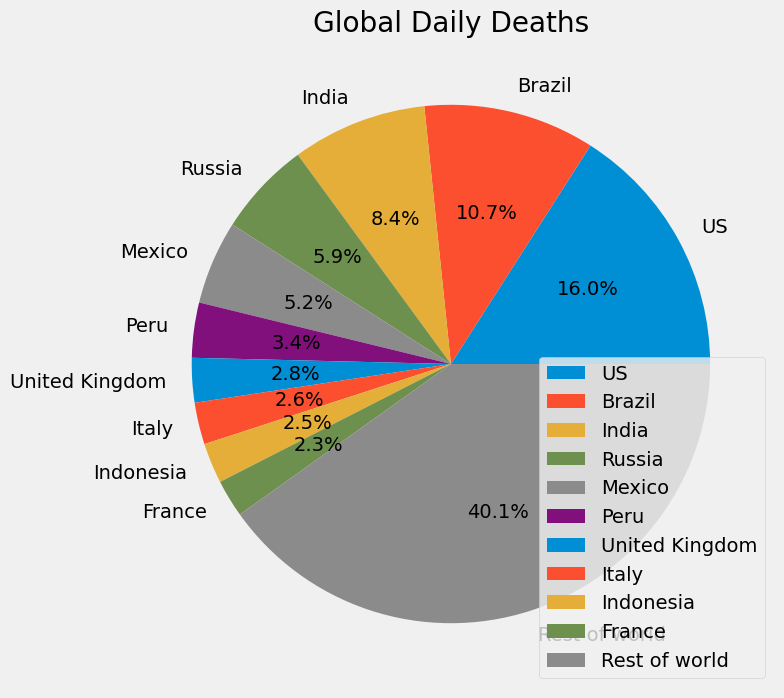

In [10]:
yesterday="2022-04-16"

today_covid=covid[covid['Date']==yesterday ]
top_10=today_covid.sort_values(['Deaths'],ascending=False)[:10]
top_10
top_10.loc['rest-of-world']=today_covid.sort_values(['Deaths'],ascending=False)[10:].sum(numeric_only=True)

top_10.loc['rest-of-world','Country']= "Rest of world"
top_10
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111)
ax.pie(top_10['Deaths'],labels=top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('Global Daily Deaths')
print("Displaying Data for",yesterday)

plt.legend(loc='best')
plt.show()

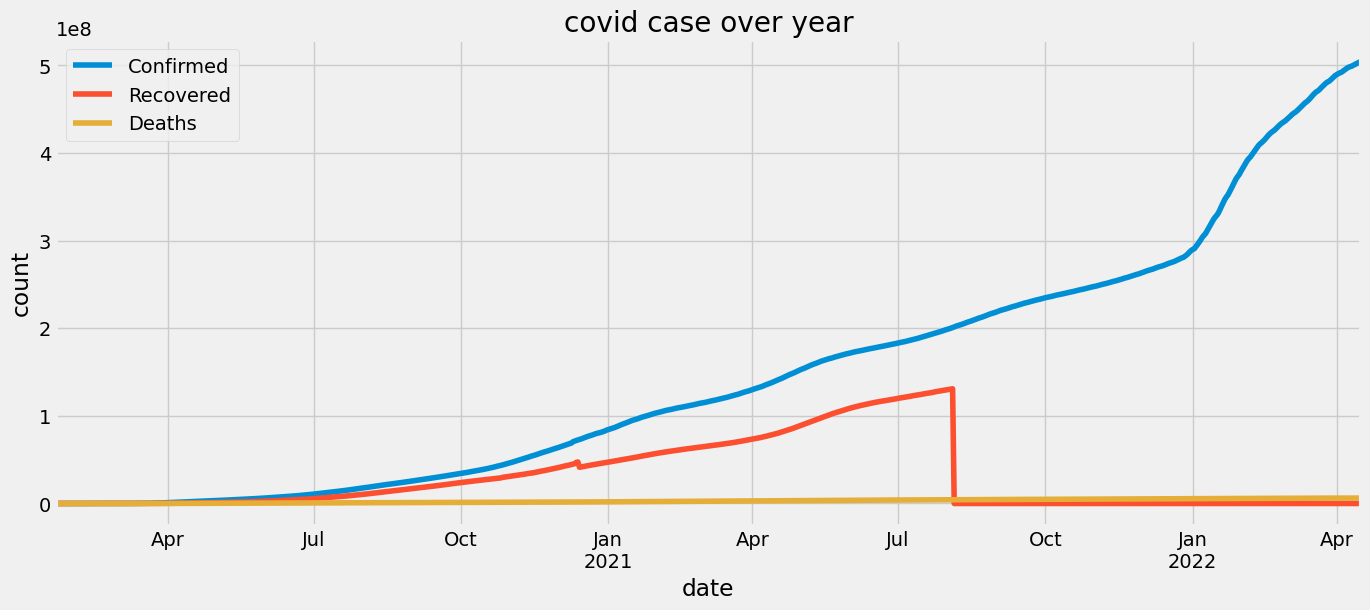

In [11]:
ax = covid.groupby('Date')[['Confirmed','Recovered','Deaths']].sum().plot(figsize=(15,6))
ax.set_xlabel("date")
ax.set_ylabel("count")
ax.title.set_text("covid case over year")



The graph illustrates a significant monthly increase in COVID-19 confirmations. Despite this, the number of deaths due to COVID-19 remains relatively constant. The recovery rate from COVID-19 has been gradually increasing over the past few months, eventually equating to the death rate.

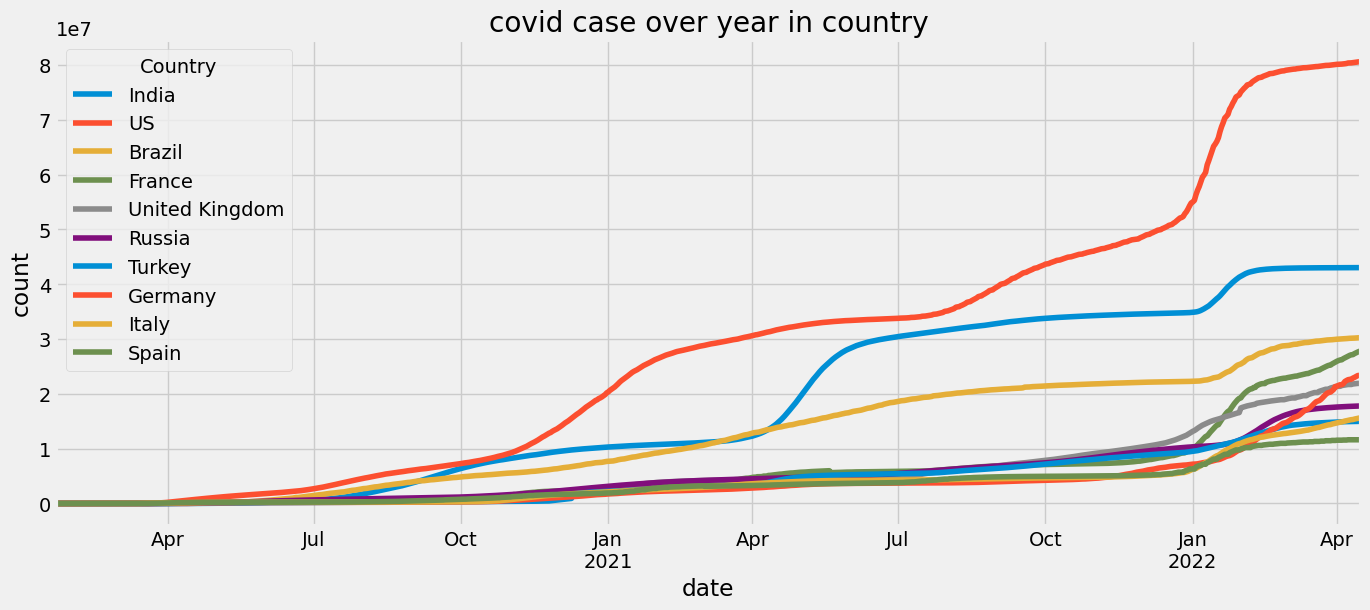

In [12]:
confirme_case = pd.pivot_table(data=covid,index='Date',columns='Country',aggfunc='sum',values='Confirmed').reset_index()
x = confirme_case[['India','US','Brazil','France',
             'United Kingdom','Russia','Turkey','Germany','Italy',
            'Spain']].set_index(confirme_case["Date"]).plot(figsize=(15,6))
x.set_xlabel("date")
x.set_ylabel("count")
x.title.set_text("covid case over year in country")

The graph illustrates the progression and confirmation of COVID-19 cases over the year in several countries. It is evident that the number of COVID-19 cases in the United States has significantly increased over the year, reaching a high level.
On the other hand, India is the second highest country in terms of COVID-19 confirmations. However, the number of confirmed cases in India is half that of the United States.

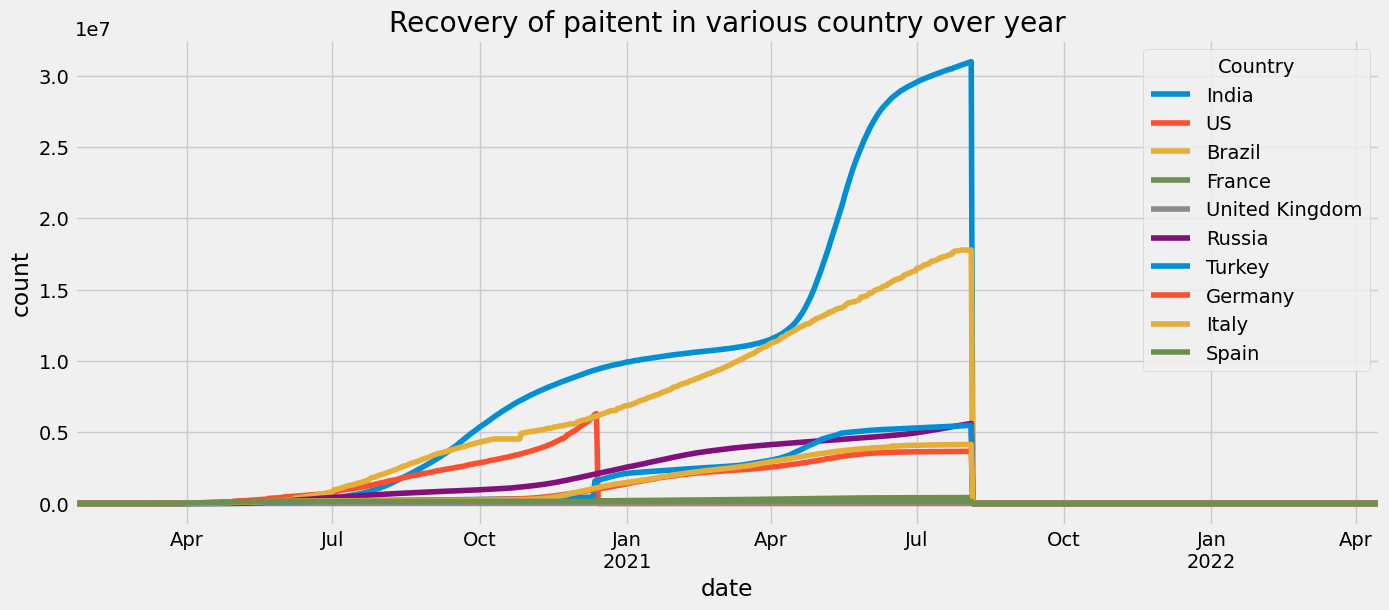

In [13]:
Recover_case = pd.pivot_table(data=covid,index='Date',columns='Country',aggfunc='sum',values='Recovered').reset_index()


x = Recover_case [['India','US','Brazil','France',
             'United Kingdom','Russia','Turkey','Germany','Italy',
            'Spain']].set_index(Recover_case ["Date"]).plot(figsize=(15,6))
x.set_xlabel("date")
x.set_ylabel("count")
x.title.set_text("Recovery of paitent in various country over year")

The graph illustrates the recovery rates of COVID-19 patients over the years in various countries. Fortunately, India has seen a significant recovery rate, placing it at the top among all countries.  Brazil follows India with the second highest recovery rate. Unfortunately, as depicted in the graph, the recovery rate in America is quite low.

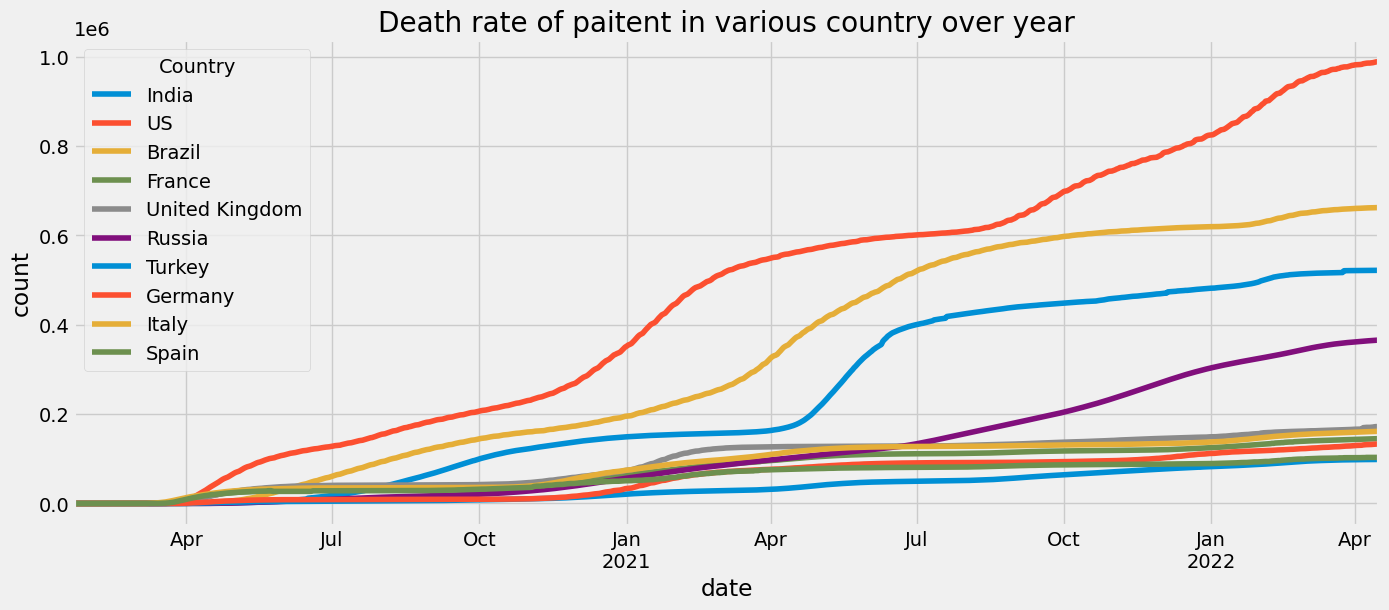

In [14]:
Death_case = pd.pivot_table(data=covid,index='Date',columns='Country',aggfunc='sum',values='Deaths').reset_index()
x = Death_case [['India','US','Brazil','France',
             'United Kingdom','Russia','Turkey','Germany','Italy',
            'Spain']].set_index(Death_case ["Date"]).plot(figsize=(15,6))
x.set_xlabel("date")
x.set_ylabel("count")
x.title.set_text("Death rate of paitent in various country over year")

The graph represents the number of deaths in various countries due to the COVID-19 virus over the years. Regrettably, the USA has seen a significant increase in the number of deaths due to COVID-19. Following the USA, Brazil has the second highest number of citizen deaths due to COVID-19.

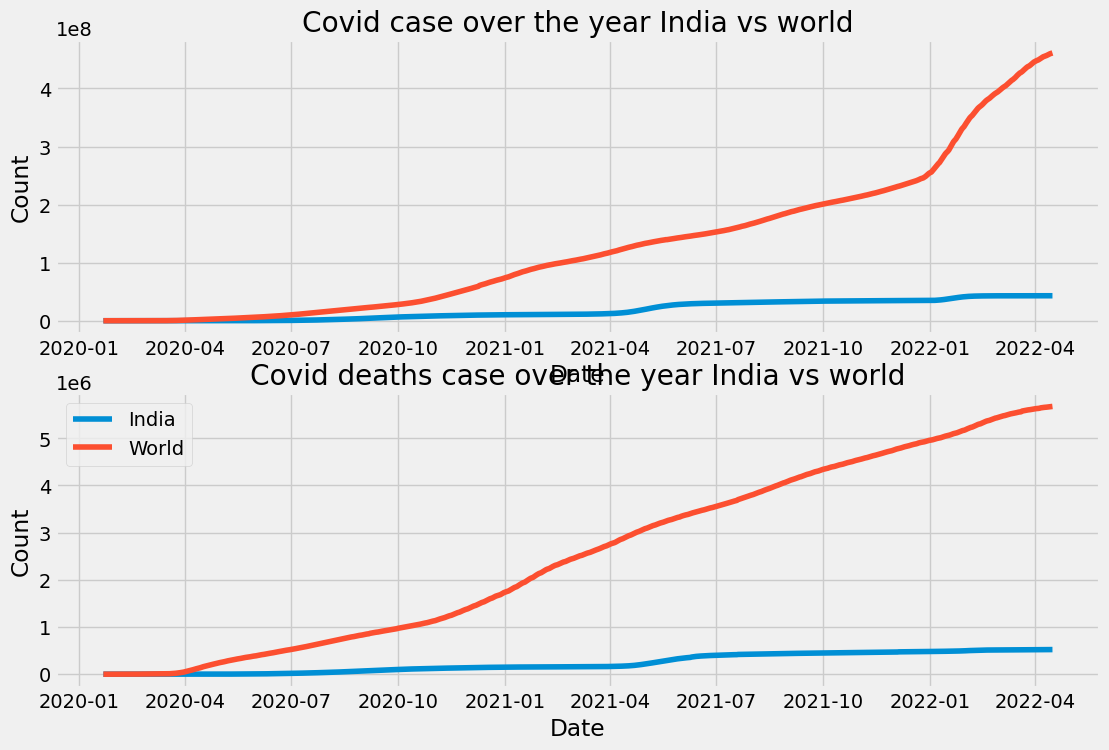

In [15]:
India = covid[covid['Country']=='India'].groupby(['Date']).sum().reset_index()
world = covid[covid['Country']!='India'].groupby(['Date']).sum().reset_index()

fig ,ax = plt.subplots(2,1,figsize=(12,8),)
ax[0].plot(India['Date'],India['Confirmed'],label='India')
ax[0].plot(world['Date'],world['Confirmed'],label='World')
ax[1].plot(India['Date'],India['Deaths'],label='India')
ax[1].plot(world['Date'],world['Deaths'],label='World')

ax[0].set_title("Covid case over the year India vs world")
ax[1].set_title("Covid deaths case over the year India vs world")
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Count')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Count')

plt.legend()


In [16]:
India['daily_deaths_case'] = India['Deaths'].sub(India['Deaths'].shift())
India['daily_Recovered_case'] = India['Recovered'].sub(India['Recovered'].shift())
India['daily_Confirmed_case'] = India['Confirmed'].sub(India['Confirmed'].shift())





<Axes: xlabel='Date', ylabel='daily_deaths_case'>

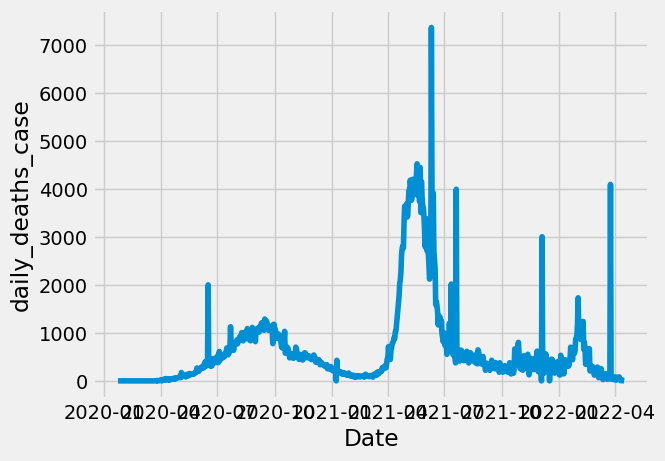

In [17]:
sns.lineplot(x = India['Date'],y =India['daily_deaths_case'],)

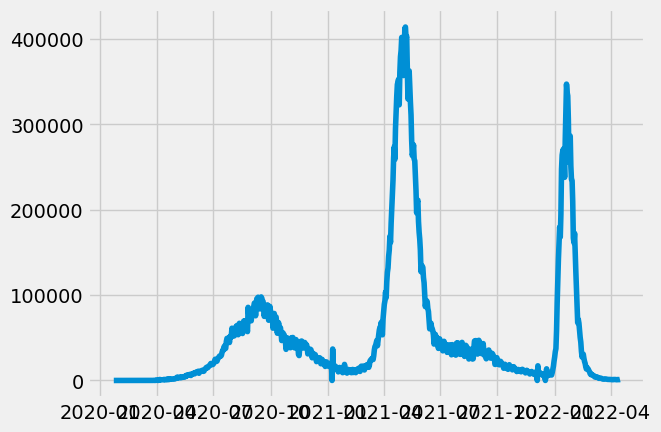

In [18]:
plt.plot(India['Date'],India['daily_Confirmed_case'])